# Übung zu: Kontextsensitive Systeme

In [16]:
#import libs 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import glob

In [17]:

# read data & show first few lines
dataFrames = []
#filenames = glob.glob("newdata/*.txt")csvData (1)_010003.txt
filenames = glob.glob("newdata/*")

for file in filenames:
    print(file)
    newDataFrame = pd.read_csv(file, sep=';', decimal=".", index_col=2)
    newDataFrame.index = pd.to_datetime(newDataFrame.index, unit='ms')
    dataFrames.append(newDataFrame)

data = pd.concat(dataFrames)

# show first few lines
data.head()

newdata\csvData (1)_010003.txt
newdata\csvData (1)_010022.txt
newdata\csvData (1)_010044.txt
newdata\csvData (1)_125920.txt
newdata\csvData (1)_125941.txt
newdata\csvData (2)_011444.txt
newdata\csvData (2)_011500.txt
newdata\csvData (2)_011511.txt
newdata\csvData (2)_011522.txt
newdata\csvData (2)_011533.txt
newdata\csvData_table (1).txt
newdata\csvData_table (2).txt
newdata\csvData_table (3).txt
newdata\csvData_table (4).txt
newdata\csvData_table (5).txt


activity sampleId  alpha  beta  gamma    x    y    z
stamp                                                                       
2021-11-04 11:51:23.670    stand      Id3  315.0  37.5    3.8 -0.1  0.1 -0.5
2021-11-04 11:51:23.713    stand      Id3  314.9  37.6    3.8  0.0 -0.1 -0.1
2021-11-04 11:51:23.729    stand      Id3  314.8  37.7    3.9  0.0  0.0 -0.1
2021-11-04 11:51:23.736    stand      Id3  314.8  37.7    3.9  0.0  0.0 -0.1
2021-11-04 11:51:23.755    stand      Id3  314.8  37.7    3.9  0.1  0.0  0.0

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

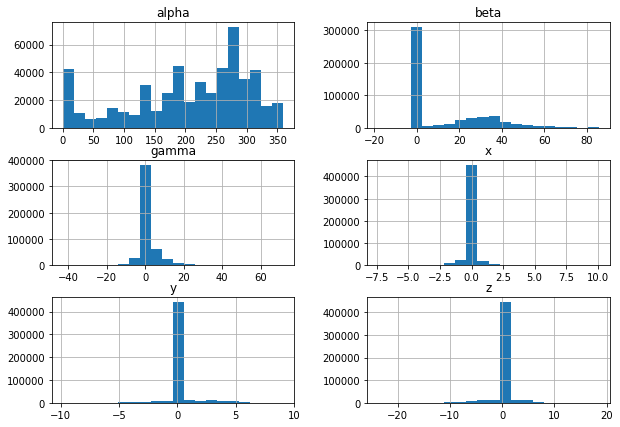

In [18]:
# show distribution of data
data.hist(figsize = (10,7), bins=20)

<AxesSubplot:>

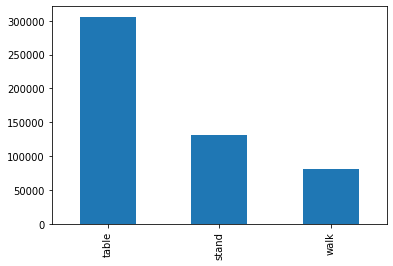

In [19]:
data['activity'].value_counts().plot(kind='bar')

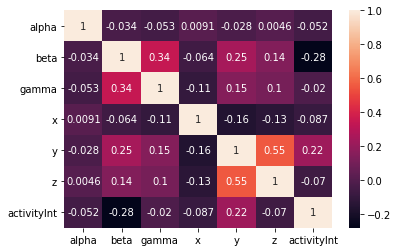

In [20]:
# show simple linear correlations

# for this we convert the activity column to a int value
data['activityInt'] = data['activity'].astype('category').cat.codes

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# drop the int column afterwards
data = data.drop('activityInt', 1)

In [21]:
# create windows

# choose features to calc
features = ['min', 'max', 'median', 'std']

# aggregate data with features
aggregated_frame = data.drop(['sampleId', 'activity'], axis=1).groupby(pd.Grouper(freq='3000ms')).aggregate(features).dropna()

# create a new dataframe with re-labled columns (& 1d columns)
aggregated_frame_1d = aggregated_frame.copy()
aggregated_frame_1d.columns = [col[0] + "_" + col[1] for col in aggregated_frame_1d.columns]

# create new dataframe with re-added old labels
aggregated_strings = data[['sampleId', 'activity']].groupby(pd.Grouper(freq='3000ms')).first()
aggregated_frame_1d_withLabels = aggregated_frame_1d.join(aggregated_strings)


In [22]:
aggregated_frame.head()

alpha                           beta              \
                      min    max median         std  min  max median   
stamp                                                                  
2021-11-04 10:31:24   0.0  270.3  270.0  107.648409  0.2  0.8    0.6   
2021-11-04 10:31:27   0.0  270.3  270.0  131.331295  0.2  0.8    0.5   
2021-11-04 10:31:30   0.0  270.3  270.0  131.522202  0.2  0.8    0.5   
2021-11-04 10:31:33   0.0  270.3  270.0  131.662991  0.2  0.8    0.5   
2021-11-04 10:31:36   0.0  270.3  270.0  132.247165  0.2  0.8    0.5   

                              gamma       ...      x              y       \
                          std   min  max  ... median       std  min  max   
stamp                                     ...                              
2021-11-04 10:31:24  0.218627  -0.5 -0.2  ...    0.0  0.002895  0.0  0.0   
2021-11-04 10:31:27  0.201729  -0.6 -0.2  ...    0.0  0.001805  0.0  0.0   
2021-11-04 10:31:30  0.197536  -0.6  0.1  ...    0.0  0.004036  0.0  0.1   
2021-11-04 10:31:33  0.197851  -0.6 -0.2  ...    0.0  0.002606 -0.2  0.2   
2021-11-04 10:31:36  0.199440  -0.6 -0.2  ...    0.0  0.000000  0.0  0.0   

                                        z                        
                    median       std  min  max median       std  
stamp                                                            
2021-11-04 10:31:24    0.0  0.000000  0.0  0.1    0.0  0.039852  
2021-11-04 10:31:27    0.0  0.000000  0.0  0.1    0.0  0.040581  
2021-11-04 10:31:30    0.0  0.001805 -0.2  0.2    0.0  0.038938  
2021-11-04 10:31:33    0.0  0.008444 -0.2  0.3    0.0  0.040184  
2021-11-04 10:31:36    0.0  0.000000  0.0  0.1    0.0  0.039642  

[5 rows x 24 columns]

In [23]:
aggregated_frame_1d_withLabels.head()

alpha_min  alpha_max  alpha_median   alpha_std  beta_min  \
stamp                                                                           
2021-11-04 10:31:24        0.0      270.3         270.0  107.648409       0.2   
2021-11-04 10:31:27        0.0      270.3         270.0  131.331295       0.2   
2021-11-04 10:31:30        0.0      270.3         270.0  131.522202       0.2   
2021-11-04 10:31:33        0.0      270.3         270.0  131.662991       0.2   
2021-11-04 10:31:36        0.0      270.3         270.0  132.247165       0.2   

                     beta_max  beta_median  beta_std  gamma_min  gamma_max  \
stamp                                                                        
2021-11-04 10:31:24       0.8          0.6  0.218627       -0.5       -0.2   
2021-11-04 10:31:27       0.8          0.5  0.201729       -0.6       -0.2   
2021-11-04 10:31:30       0.8          0.5  0.197536       -0.6        0.1   
2021-11-04 10:31:33       0.8          0.5  0.197851       -0.6       -0.2   
2021-11-04 10:31:36       0.8          0.5  0.199440       -0.6       -0.2   

                     ...  y_min  y_max  y_median     y_std  z_min  z_max  \
stamp                ...                                                   
2021-11-04 10:31:24  ...    0.0    0.0       0.0  0.000000    0.0    0.1   
2021-11-04 10:31:27  ...    0.0    0.0       0.0  0.000000    0.0    0.1   
2021-11-04 10:31:30  ...    0.0    0.1       0.0  0.001805   -0.2    0.2   
2021-11-04 10:31:33  ...   -0.2    0.2       0.0  0.008444   -0.2    0.3   
2021-11-04 10:31:36  ...    0.0    0.0       0.0  0.000000    0.0    0.1   

                     z_median     z_std  sampleId  activity  
stamp                                                        
2021-11-04 10:31:24       0.0  0.039852         1     table  
2021-11-04 10:31:27       0.0  0.040581       Id3     table  
2021-11-04 10:31:30       0.0  0.038938       Id3     table  
2021-11-04 10:31:33       0.0  0.040184         2     table  
2021-11-04 10:31:36       0.0  0.039642         5     table  

[5 rows x 26 columns]

<ipython-input-24-27d4dfa19188>:15: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.5)


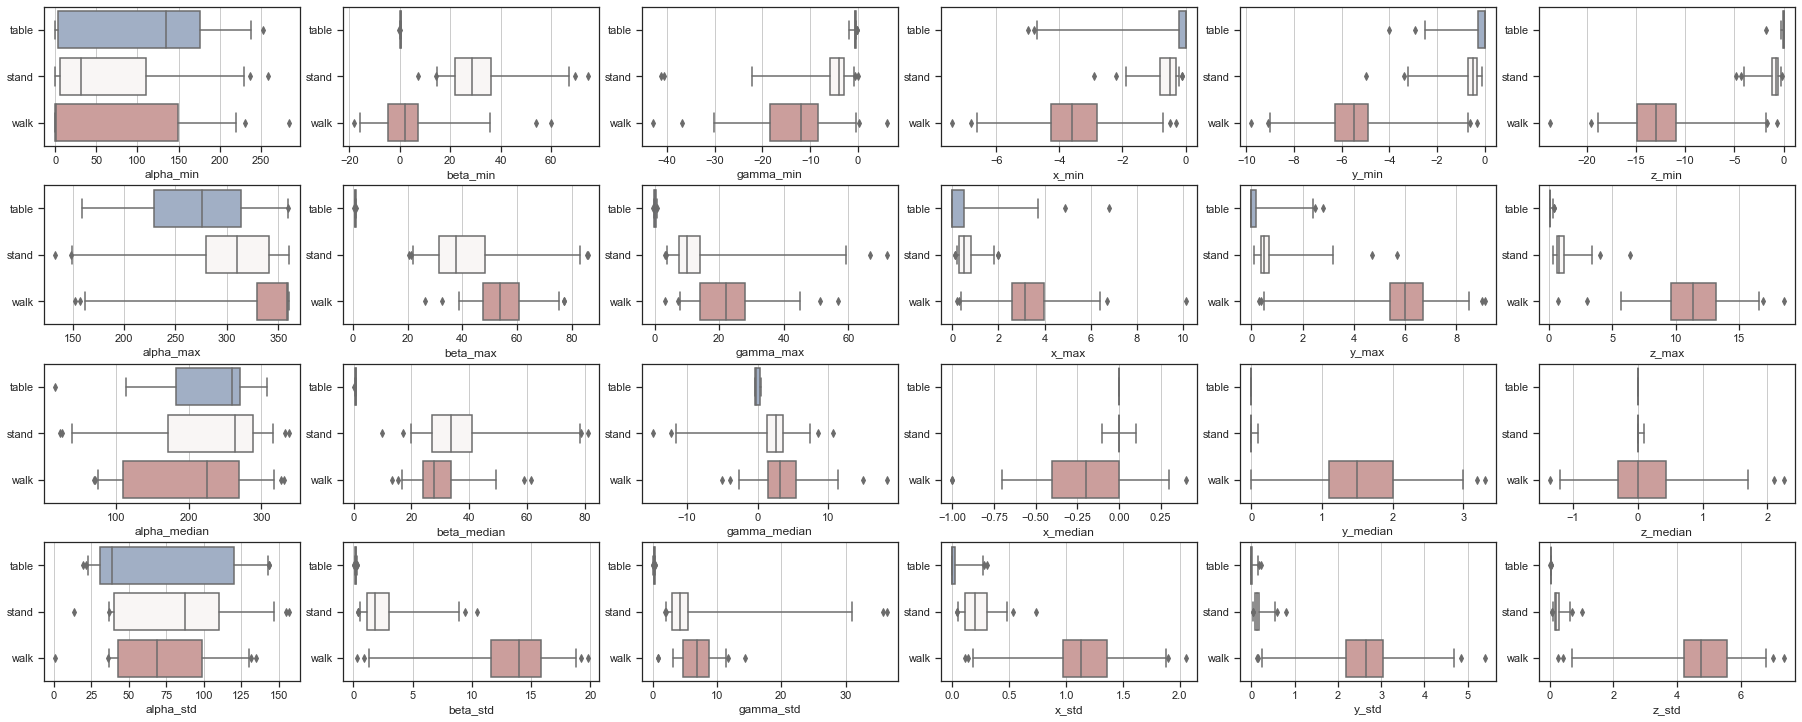

In [24]:
sn.set(style="ticks")
aggregate_columns = aggregated_frame_1d_withLabels.columns[:-2]
aggregates = ['min', 'max', 'median', 'std']
num_aggregates = len(aggregates)
f, ax = plt.subplots(num_aggregates, int(len(aggregate_columns)/num_aggregates),figsize=(25, 10))
for idx, column in enumerate(aggregate_columns):
    this_ax = ax[idx % num_aggregates,int(idx/num_aggregates)]
    
    # Plot the orbital period with horizontal boxes (outlier being outside 1%/99% of the data)
    sn.boxplot(x=column, y="activity", data=aggregated_frame_1d_withLabels, whis=[1, 99], palette="vlag", ax=this_ax)
    
    # Tweak the visual presentation
    this_ax.xaxis.grid(True)
    this_ax.set(ylabel="")
plt.tight_layout(0.5)


C:\Users\jonat\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jonat\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\jonat\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


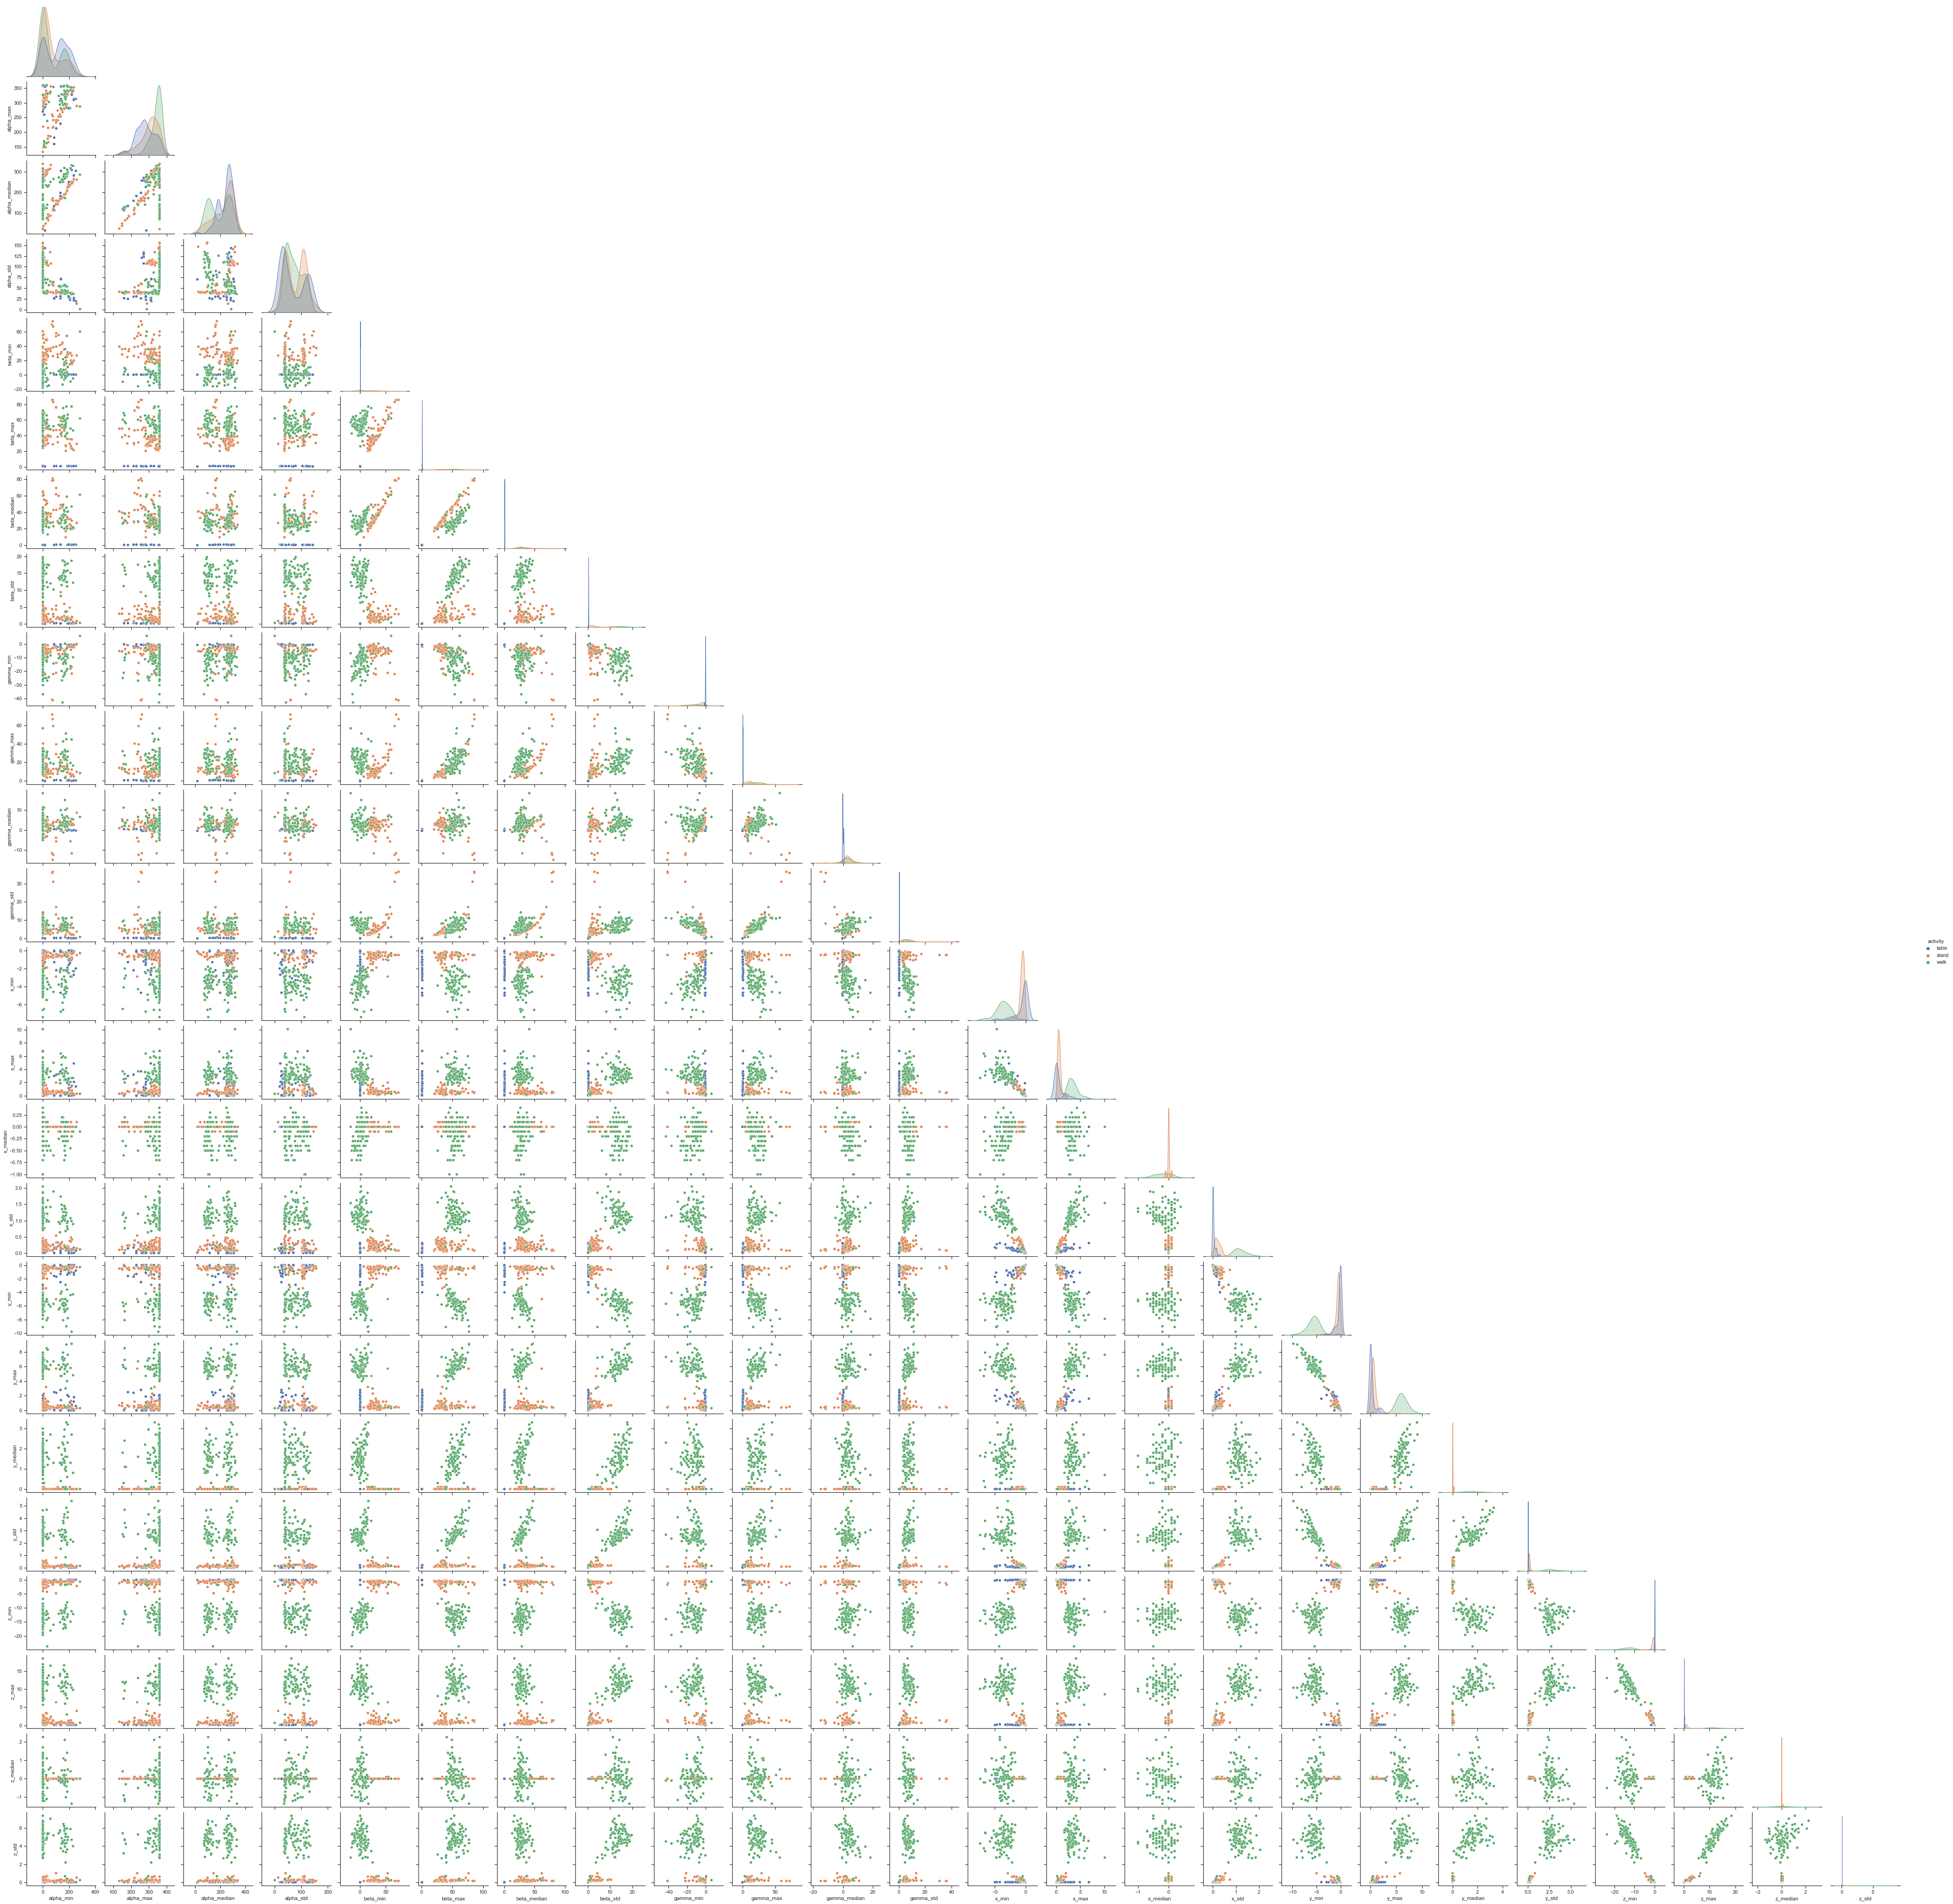

In [25]:
sn.pairplot(aggregated_frame_1d_withLabels, hue="activity", corner=True);